# Восстановление золота из руды

## Подготовка данных

In [ ]:
#Импорт библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics.scorer import make_scorer

In [ ]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [ ]:
df_train['date'] = pd.to_datetime (df_train['date'], format = '%Y-%m-%d %H:%M:%S')

In [ ]:
df_train.head(2)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184


Преобразование даты прошло успешно, посмотрим пока на другие выборки

In [ ]:
df_test['date'] = pd.to_datetime (df_test['date'], format = '%Y-%m-%d %H:%M:%S')

Столбцов стало меньше, посмотрим каких нет (помимо целевого признака)

In [ ]:
columns_1 = df_train.columns
columns_2 = df_test.columns
print (len (columns_1[~columns_1.isin(columns_2)]))
print (columns_1[~columns_1.isin(columns_2)])

34
Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.ou

Видимо, пропали все признаки, содержащие часть output. Посмотрим теперь на полный датасет. 

In [ ]:
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [ ]:
df_full['date'] = pd.to_datetime (df_full['date'], format = '%Y-%m-%d %H:%M:%S')

Даже в полном датасете есть пропуски в целевом признаке. Запомним. 

### Проверка правильности расчета эффективности обогащения

Ранее было обнаружены пропуски в целевых значениях, посмотрим на их количество.

In [ ]:
df_train.shape

(16860, 87)

In [ ]:
df_train['final.output.recovery'].isna().sum()

1521

Почти 10% пропусков. Такая потеря, конечно, обидная, но придется пойти на эту жертву. Удалю строки, где есть пропуски целевых значений.

In [ ]:
df_train.dropna(subset = ['final.output.recovery'], inplace = True)

In [ ]:
df_train.shape #проверка удаления

(15339, 87)

Проверим пропуски в строках, нужных для расчета. 

In [ ]:
print ('Пропуски в концентрате:', df_train['rougher.output.concentrate_au'].isna().sum())
print ('Пропуски в подаче:', df_train['rougher.input.feed_au'].isna().sum())
print ('Пропуски в хвостах:', df_train['rougher.output.tail_au'].isna().sum())

Пропуски в концентрате: 0
Пропуски в подаче: 0
Пропуски в хвостах: 966


По условию задачи соседние строки близки по значению, поэтому заполню пропуски соседними значениями в Хвостах. 

In [ ]:
df_train['rougher.output.tail_au'] = df_train['rougher.output.tail_au'].fillna(method='ffill')

In [ ]:
print ('Пропуски в хвостах:', df_train['rougher.output.tail_au'].isna().sum())

Пропуски в хвостах: 0


Проверка (расчет) эффективности обогощения. 

Формула для расчета эффективности обогощения выглядит так. 
Введем для расчета коэффициенты, как в формуле, и проверим правильность данных в файле. 

**recovery = (C * (F - T)) / (F * (C - T)) * 100**


In [ ]:
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

recovery_t =df_train['rougher.output.recovery']

recovery = (C * (F - T)) / (F * (C - T)) * 100

# заменяем полученные в наборе бесконечности на ноль
recovery = recovery.replace([np.inf, -np.inf], 0)

# считаем среднюю абсолютную ошибку между величинами
MAE = (abs(recovery - recovery_t)).sum() / len (recovery)
MAE

8.833996145407206e-15

### Признаки недоступные в тестовой выборке

In [ ]:
columns_1 = df_train.columns
columns_2 = df_test.columns
print (columns_1[~columns_1.isin(columns_2)])

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.outpu

Отсутствуют все выходные значения. Конечно, нет целевого признака - rougher.output.recovery. Но нет так же и тех, по которым показатель восстановления золота из рубы считался на предыдущем шаге. Есть только подача - input.feed_au. Значит задача моделей будет по косвенным признакам определить степень восстановления.

### Предобработка данных

In [ ]:
df_train.shape

(15166, 88)

Т.к. я подчистил немного выборки, заполню пропуски по ближайшим значенями и пойду дальше. 

In [ ]:
df_train = df_train.fillna(method='ffill')
df_test = df_test.fillna(method='ffill')

## Анализ данных

### Изменения концентрация металлов (Au, Ag, Pb) на различных этапах очистки

In [ ]:
#Золото
df_train[['rougher.input.feed_au', 'rougher.output.concentrate_au',
         'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']].head()

,rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
0,6.486150,19.793808,34.174427,42.192020
1,6.478583,20.050975,34.118526,42.701629
2,6.362222,19.737170,33.969464,42.657501
3,6.118189,19.320810,28.260743,42.689819
4,5.663707,19.216101,33.044932,42.774141


In [ ]:
#Серебро
df_train[['rougher.input.feed_ag', 'rougher.output.concentrate_ag',
         'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']].head()

,rougher.input.feed_ag,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
0,6.100378,11.500771,8.547551,6.055403
1,6.161113,11.615865,8.558743,6.029369
2,6.116455,11.695753,8.603505,6.055926
3,6.043309,11.915047,7.221879,6.047977
4,6.060915,12.411054,9.089428,6.148599


In [ ]:
#Свинец
df_train[['rougher.input.feed_pb', 'rougher.output.concentrate_pb',
         'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']].head()

,rougher.input.feed_pb,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
0,2.284912,7.101074,10.389648,9.889648
1,2.266033,7.278807,10.497069,9.968944
2,2.159622,7.216833,10.354494,10.213995
3,2.037807,7.175616,8.496563,9.977019
4,1.786875,7.240205,9.986786,10.142511


In [ ]:
#Золото, средние значения
df_train[['rougher.input.feed_au', 'rougher.output.concentrate_au',
         'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']].mean()

rougher.input.feed_au                     8.242625
rougher.output.concentrate_au            19.442296
primary_cleaner.output.concentrate_au    31.869465
final.output.concentrate_au              43.076574
dtype: float64

In [ ]:
#Серебро, средние значения
df_train[['rougher.input.feed_ag', 'rougher.output.concentrate_ag',
         'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']].mean()

rougher.input.feed_ag                     8.938629
rougher.output.concentrate_ag            12.014341
primary_cleaner.output.concentrate_ag     8.502405
final.output.concentrate_ag               5.582915
dtype: float64

In [ ]:
#Свинец, средние значения
df_train[['rougher.input.feed_pb', 'rougher.output.concentrate_pb',
         'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']].mean()

rougher.input.feed_pb                     3.968307
rougher.output.concentrate_pb             7.991630
primary_cleaner.output.concentrate_pb     9.768857
final.output.concentrate_pb              10.348369
dtype: float64

**Вывод**

Золото ведет себя наилучшим образом! У него растет концентрация от этапа к этапу, все-таки это золотодобывающее предприятие. Почти также ведет себя свинец, хотя на последнем этапе растет не сильно. А вот серебро ведет себя очень странно. Концентрация на входе выше, чем концетрация на выходе. Возомжно, так и надо, но серебро первый кандидат на удаление из признаков для обучения модели.  

**Графическое представление изменения концентраций в процессе обогащения руды**

Изменение концентраций в процессе обогащения руды


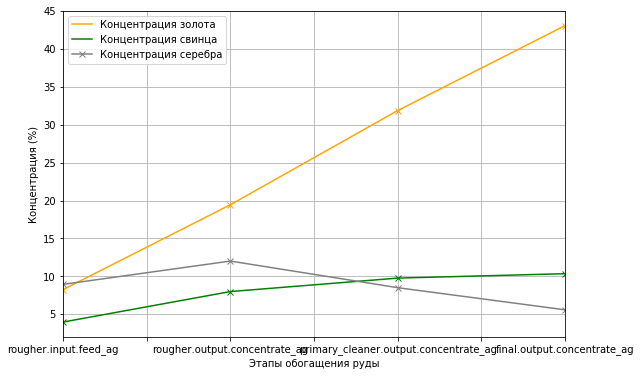

In [ ]:
print('Изменение концентраций в процессе обогащения руды')

#Золото
df_train[['rougher.input.feed_au', 'rougher.output.concentrate_au',
         'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']].mean().plot(
    style='-x', grid = True,color = 'orange', label = 'Концентрация золота',legend = True, figsize = (9,6))

#Свинец
df_train[['rougher.input.feed_pb', 'rougher.output.concentrate_pb',
         'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']].mean().plot(
    style='-x', grid = True, label = 'Концентрация свинца', color = 'green',legend = True)

#Серебро
df_train[['rougher.input.feed_ag', 'rougher.output.concentrate_ag',
         'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']].mean().plot(
    style='-x', grid = True, label = 'Концентрация серебра', color = 'gray',legend = True)

plt.xlabel('Этапы обогащения руды')
plt.ylabel('Концентрация (%)')
plt.show()

### Сравнение размеров гранул сырья

Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

In [ ]:
#Тестовая
df_test['primary_cleaner.input.feed_size'].describe()

count    5856.000000
mean        7.264651
std         0.611526
min         5.650000
25%         6.885625
50%         7.259333
75%         7.650000
max        15.500000
Name: primary_cleaner.input.feed_size, dtype: float64

In [ ]:
#Обучающая
df_train['primary_cleaner.input.feed_size'].describe()

count    15166.000000
mean         7.796677
std          6.742211
min          1.080000
25%          6.940000
50%          7.290000
75%          7.690000
max        100.000000
Name: primary_cleaner.input.feed_size, dtype: float64

Уже видно, что на обучающей выборке есть очень маленькие и очень большие значения. Посмотрим на распределения и потом избавимся от них.

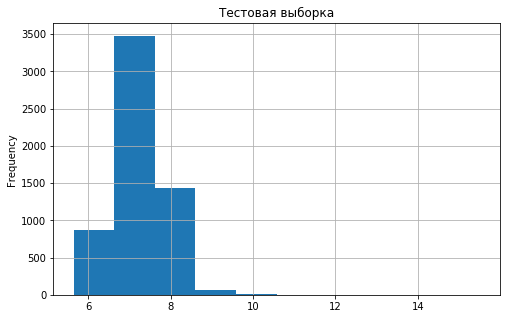

In [ ]:
df_test['primary_cleaner.input.feed_size'].plot(kind = 'hist', grid = True, figsize = (8,5), title='Тестовая выборка')

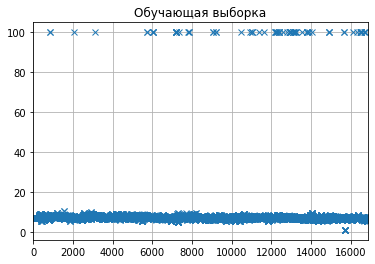

In [ ]:
df_train['primary_cleaner.input.feed_size'].plot(style = 'x', grid = True, title='Обучающая выборка')

Как видно, между средними значенями и максимальными нет ничего. Поэтому они явно вбросы. Удалю их.

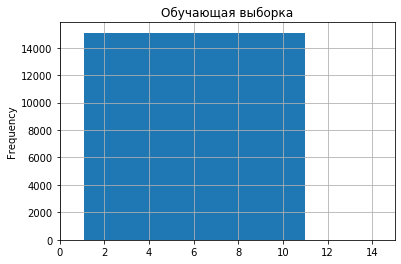

In [ ]:
df_train['primary_cleaner.input.feed_size'].plot(kind = 'hist', grid = True, xlim = (0,15), title='Обучающая выборка')

C распределением есть кое-какие проблемы. Сейчас выкинем очень большие значения. 

In [ ]:
df_train = df_train[df_train['primary_cleaner.input.feed_size']<20]

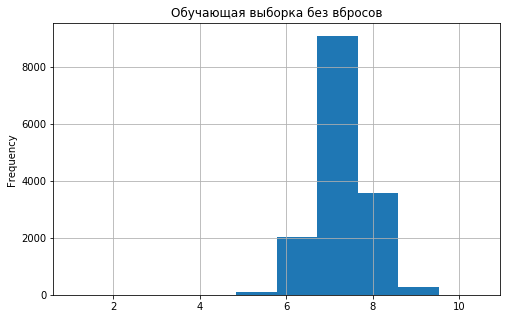

In [ ]:
df_train['primary_cleaner.input.feed_size'].plot(kind = 'hist', grid = True, figsize = (8, 5), title='Обучающая выборка без вбросов')

Вот теперь распределения стали похожи. Посмотрим, сколько у нас значений очень мелких фракций (меньше 4) и заодно избавимся и от них. 

In [ ]:
df_train[df_train['primary_cleaner.input.feed_size'] < 4]['date'].count()

8

In [ ]:
#невелика потеря, удалю их
df_train = df_train[df_train['primary_cleaner.input.feed_size'] > 4]

In [ ]:
#Train data
df_train['primary_cleaner.input.feed_size'].describe()

count    15078.000000
mean         7.311033
std          0.594480
min          4.970000
25%          6.940000
50%          7.282583
75%          7.680000
max         10.470000
Name: primary_cleaner.input.feed_size, dtype: float64

In [ ]:
#Test data
df_test['primary_cleaner.input.feed_size'].describe()

count    5856.000000
mean        7.264651
std         0.611526
min         5.650000
25%         6.885625
50%         7.259333
75%         7.650000
max        15.500000
Name: primary_cleaner.input.feed_size, dtype: float64

На тестовой выборке тоже надо избавиться от подобных значений, если они есть.

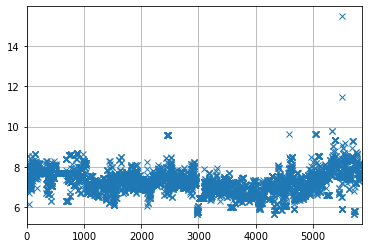

In [ ]:
df_test['primary_cleaner.input.feed_size'].plot(style = 'x', grid = True)

In [ ]:
#тут два значения всего выше 10, удалю их.
df_test = df_test[df_test['primary_cleaner.input.feed_size']<10]

**Вывод**

Теперь распределния стали похожи. Среднее и стандартное отклонение очень близки. Поэтому можно переходить к следующему шагу. 

### Исследование суммарной концентрации всех веществ

In [ ]:
concentrate = []
for name in df_train.columns:
    if 'concentrate' in name:
        concentrate.append(name)

In [ ]:
concentrate

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au']

In [ ]:
concentrate.remove('rougher.calculation.sulfate_to_au_concentrate')

In [ ]:
df_train[concentrate].agg('sum')

final.output.concentrate_ag                76638.301582
final.output.concentrate_pb               148837.375498
final.output.concentrate_sol              134238.579308
final.output.concentrate_au               644952.428866
primary_cleaner.output.concentrate_ag     120888.762229
primary_cleaner.output.concentrate_pb     140037.372840
primary_cleaner.output.concentrate_sol    148354.700116
primary_cleaner.output.concentrate_au     475082.769345
rougher.output.concentrate_ag             174127.773356
rougher.output.concentrate_pb             113109.454287
rougher.output.concentrate_sol            418042.012228
rougher.output.concentrate_au             286720.327469
dtype: float64

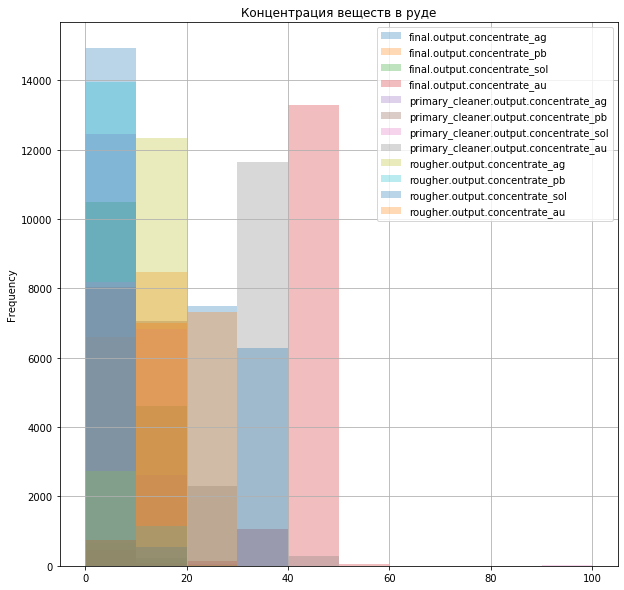

In [ ]:
df_train[concentrate].plot(kind='hist', figsize = (10,10), grid = True, alpha = 0.3, title='Концентрация веществ в руде')

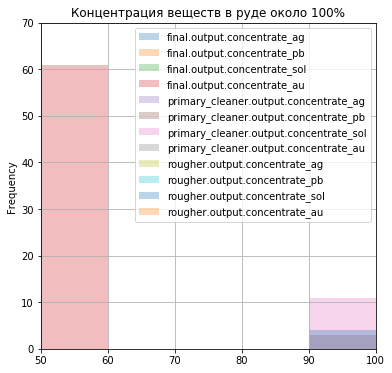

In [ ]:
df_train[concentrate].plot(
    kind='hist', figsize = (6,6), grid = True, alpha = 0.3, 
    xlim = (50,100), ylim = (0,70), title='Концентрация веществ в руде около 100%'
)

Видны вборсы в районе 100

In [ ]:
df_train[concentrate].max()

final.output.concentrate_ag                16.001945
final.output.concentrate_pb                17.031899
final.output.concentrate_sol               18.124851
final.output.concentrate_au                52.756638
primary_cleaner.output.concentrate_ag      16.081632
primary_cleaner.output.concentrate_pb     100.000000
primary_cleaner.output.concentrate_sol    100.000000
primary_cleaner.output.concentrate_au      45.933934
rougher.output.concentrate_ag              24.480271
rougher.output.concentrate_pb              15.389648
rougher.output.concentrate_sol            100.000000
rougher.output.concentrate_au              28.146838
dtype: float64

Есть три аномальные концентрации, т.к. распределение не сплошное и в районе 100 процентов есть островок аномалий. Исходя из этого делаю вывод, что такие данные являются вбросами и их надо удалить. Но в задании сказано, что их надо удалить из обеих выборок, т.е. можно предположить, что они есть в ТЕСТЕ (хотя их там быть не должно), но проверим по индексам - времени

In [ ]:
df_train[df_train['primary_cleaner.output.concentrate_pb'] > 80]['date'].head()

7330     2017-03-17 09:59:59
7331     2017-03-17 10:59:59
13556    2018-04-02 19:59:59
Name: date, dtype: object

In [ ]:
df_test[df_test['date'].isin(df_train[df_train['primary_cleaner.output.concentrate_pb'] > 80]['date'])]['date'].count()

0

Т.к. в тест не попадают значения из обучающей выборки, такхи индексов в тестовой не нашлось. Поэтому удаляю аномалии только из обучающей выборки. 

In [ ]:
df_train = df_train[df_train['primary_cleaner.output.concentrate_pb'] < 80]
df_train = df_train[df_train['primary_cleaner.output.concentrate_sol'] < 80]
df_train = df_train[df_train['rougher.output.concentrate_sol'] < 80]

In [ ]:
df_train[concentrate].describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,5.083893,9.874504,8.906036,42.786744,8.018754,9.271093,9.772536,31.507209,11.548608,7.501002,27.701777,19.013236
std,1.656406,2.260929,3.196188,8.403420,2.384444,3.085829,4.376554,7.641300,3.267939,2.181183,7.472950,4.775076
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.169718,9.209803,7.281912,42.962350,6.998249,7.981207,7.134801,30.535327,10.406615,6.762186,26.472960,18.271887
50%,4.987178,10.238614,8.756064,44.754662,8.194040,9.827682,9.562287,33.033603,11.729889,7.734390,29.236106,19.910625
75%,5.893712,11.144484,10.456678,46.102436,9.520302,11.241539,12.954685,35.215077,13.475012,8.595496,31.806743,21.414365
max,16.001945,17.031899,18.124851,52.756638,16.081632,17.081278,22.280845,45.933934,24.480271,15.389648,40.089993,28.146838


Теперь с концентрациями все в порядке. Можно двигаться дальше.

## Модель

### Функция для расчета sMAPE

In [ ]:
def smape(target, prediction):
    scores = []
    result = 0
    target = pd.Series(target).reset_index(drop=True)
    prediction = pd.Series(prediction).reset_index(drop=True)
    
    for i in range(1, len(target)):
        if (np.abs(target[i]) + np.abs(prediction[i])) < 0.01:
            score = 1 # в result будет перевод в проценты, 1 эквивалентно 100%
        else:
            score = (2 * np.abs(target[i] - prediction[i])) / (np.abs(target[i])+ np.abs(prediction[i]))
        scores.append(score)
    scores = pd.Series(scores)
    result = scores.sum()*100/(len(scores))
    return result

def smape_final (smape_rougher, smape_final):
    result = 0.25*smape_rougher + 0.75*smape_final
    return result

Проверка работаспособности

In [ ]:
y = [0]*10
x = [1]*10
print ('Проверка, 200% = ', smape(x,y))

Проверка, 200% =  200.0


In [ ]:
y = [0]*10
x = [0]*10
print ('Проверка, 100% = ', smape(x,y))

Проверка, 100% =  100.0


In [ ]:
y = [0]*10
x = [0]*10
print ('Проверка, 100% = ', smape_final(smape(x,y), smape(x,y)))

Проверка, 100% =  100.0


### Подготовка выборок

Разобьем выборки на признаки и цели для обучающей выборки

In [ ]:
list_features = df_test.columns

df_train = df_train.reset_index(drop=True)

features_train = df_train[list_features]
features_train = features_train.drop(['date'], axis = 1)

target_train_fin = df_train ['final.output.recovery']
target_train_rou = df_train ['rougher.output.recovery']

In [ ]:
features_train.shape, target_train_rou.shape, target_train_fin.shape

((15064, 52), (15064,), (15064,))

Добавим целевые признаки на тестовую выборку (из полной, по параметру дата)

In [ ]:
df_test_2 = df_full[df_full['date'].isin(df_test['date'])]

In [ ]:
df_test_2 = df_test_2[['date', 'final.output.recovery', 'rougher.output.recovery']]
df_test_2.shape

(5854, 3)

In [ ]:
df_test = df_test.merge(df_test_2, on = 'date', how = 'left')

Целевые признаки есть не везде, поэтому удалим пропущенные по таргету строки.

In [ ]:
df_test.dropna(subset = ['final.output.recovery'], inplace = True)
df_test.dropna(subset = ['rougher.output.recovery'], inplace = True)
df_test = df_test.reset_index(drop=True)
df_test.shape

(5288, 55)

Отделяю обучающие признаки от целевого для тестовой выборки

In [ ]:
features_test = df_test[list_features]
features_test = df_test.drop(['date', 'final.output.recovery', 'rougher.output.recovery'], axis = 1)

target_test_fin = df_test ['final.output.recovery']
target_test_rou = df_test ['rougher.output.recovery']

In [ ]:
features_test.shape, target_test_fin.shape, target_test_rou.shape

((5288, 52), (5288,), (5288,))

### Лучшая модель на кросс-валидации

In [ ]:
#Метрика оценки sMAPE
smape_score = make_scorer(smape, greater_is_better=True)

#### Линейная регрессия

In [ ]:
model_lin = LinearRegression(normalize = True)

scores_rou = cross_val_score(model_lin, features_train, target_train_rou, cv=5, scoring = smape_score)
scores_fin = cross_val_score(model_lin, features_train, target_train_fin, cv=5, scoring = smape_score)

scores_rougher = scores_rou.sum() / 5
scores_final = scores_fin.sum() / 5

score_linear = smape_final (scores_rougher, scores_final)
print('Средняя оценка качества модели линейной регрессии: {:.3f}'.format(score_linear))

Средняя оценка качества модели линейной регрессии: 14.058


#### Случайный лес

In [ ]:
%%time

best_model_forest = None
best_score_forest = 10000
best_depth_forest = 0
best_est_forest = 0

for depth in range(5, 6):
    for est in range(40, 51, 10):
        model_forest = RandomForestRegressor(
            max_depth = depth, n_estimators = est, random_state = 12321)
        
        scores_rou = cross_val_score(model_forest, features_train, target_train_rou, cv=5, scoring = smape_score)
        scores_fin = cross_val_score(model_forest, features_train, target_train_fin, cv=5, scoring = smape_score)

        scores_rougher = scores_rou.sum() / 5
        scores_final = scores_fin.sum() / 5
    
        score_forest = smape_final (scores_rougher, scores_final)
    
        if score_forest < best_score_forest:
            best_model_forest = model_forest
            best_score_forest = score_forest
            best_depth_forest = depth
            best_est_forest = est
            
        
print ('Модель случайного леса')
print ('Средняя оценка качества модели случайного леса: {:.3f}'.format(best_score_forest))
print ('Глубина дерева: {:}'.format(best_depth_forest))
print ('Количество деревьев: {:}'.format(best_est_forest))

Модель случайного леса
Средняя оценка качества модели случайного леса: 10.890
Глубина дерева: 5
Количество деревьев: 50
CPU times: user 3min 36s, sys: 14.2 ms, total: 3min 36s
Wall time: 3min 38s


#### Дерево предсказаний

In [ ]:
best_model_tree = None
best_score_tree = 10000
best_depth_tree = 0

for depth in range(1, 7):
    model_tree = DecisionTreeRegressor(max_depth = depth, random_state = 12321)
    scores_rou = cross_val_score(model_tree, features_train, target_train_rou, cv=5, scoring = smape_score)
    scores_fin = cross_val_score(model_tree, features_train, target_train_fin, cv=5, scoring = smape_score)

    scores_rougher = scores_rou.sum() / 5
    scores_final = scores_fin.sum() / 5
    
    score_tree = smape_final (scores_rougher, scores_final)
    
    if score_tree < best_score_tree:
        best_model_tree = model_tree
        best_score_tree = score_tree
        best_depth_tree = depth
        
print ('Модель предсказательного дерева')
print ('Средняя оценка качества модели дерева: {:.3f}'.format(best_score_tree))
print ('Глубина дерева: {:}'.format(best_depth_tree))

Модель предсказательного дерева
Средняя оценка качества модели дерева: 11.479
Глубина дерева: 3


#### Результаты расчетов

In [ ]:
print('Средняя оценка качества модели линейной регрессии: {:.3f}'.format(score_linear))
print ('Средняя оценка качества модели дерева: {:.3f}'.format(best_score_tree))
print ('Средняя оценка качества модели случайного леса: {:.3f}'.format(best_score_forest))

Средняя оценка качества модели линейной регрессии: 14.058
Средняя оценка качества модели дерева: 11.479
Средняя оценка качества модели случайного леса: 10.890


**Вывод**

Побеждает модель случайного леса, для которой и проведем предсказания на тестовой выборке. Как и в тренажере, из простых моделей предсказуемо побеждает случайный лес. Самая долгосчитаемая модель и дает самый точный результат.

### Проверка на тестовой выборке

In [ ]:
model_forest = RandomForestRegressor(
            max_depth = 5, n_estimators = 50, random_state = 12321)
        
t_scores_rou = cross_val_score(model_forest, features_test, target_test_rou, cv=5, scoring = smape_score)
t_scores_fin = cross_val_score(model_forest, features_test, target_test_fin, cv=5, scoring = smape_score)

scores_rougher = t_scores_rou.sum() / 5
scores_final = t_scores_fin.sum() / 5
    
test_score = smape_final (scores_rougher, scores_final)

In [ ]:
print ('Итоговый sMAPE для тестовой выборки на лучшей модели: {:.3f}%'.format(test_score))

Итоговый sMAPE для тестовой выборки на лучшей модели: 11.364%


###  Сравнение с константной моделью

Найдем медиану по целевым признакам и сделаю из них массив нужной длины. 

In [ ]:
median_rou = [target_train_rou.median()] * len(target_train_rou)
median_fin = [target_train_fin.median()] * len(target_train_fin)

In [ ]:
score_median_rougher = smape (target_train_rou, median_rou)
score_median_final = smape (target_train_fin, median_fin)

score_median = smape_final (score_median_rougher, score_median_final)
print('Средняя оценка качества константной модели: {:.3f}'.format(score_median))

Средняя оценка качества константной модели: 11.917


In [ ]:
print('Средняя оценка качества модели линейной регрессии: {:.3f}'.format(score_linear))
print ('Средняя оценка качества модели дерева: {:.3f}'.format(best_score_tree))
print ('Средняя оценка качества модели случайного леса: {:.3f}'.format(best_score_forest))

Средняя оценка качества модели линейной регрессии: 14.058
Средняя оценка качества модели дерева: 11.479
Средняя оценка качества модели случайного леса: 10.890


Очень интерсный результат! Линейная регрессия предсказывает хуже, чем просто медиана. Но зато две другие модели работают лучше (не на много, правда)

## Вывод

В результате проекта была выбрана модель для предсказания степени обогащения золотоносной руды. Итоговая погрешность составила 11 процентов, что является неплохим результатом. Хотя и немногим ниже константной модели. 